In [1]:
'''
Parametros para el modelado del regenerador de la Articulo de Kilkovsky 2020
'''
import numpy as np
#Datos del modelo
m_d = 79.2  # Flujo masico [kg/h]
Te = 727    # Temperatura de entrada [C]
Ta = 25     # Temperatura ambiente [C]
rhog = 0.51  # Densidad del gas [kg/m3]
Cpg  = 1060 # Calor especifico del gas [J/kg.K]
Kg   = 0.046 # Conductividad termica del gas [W/m.K]
Qh    =m_d/(rhog) # Flujo volumetrico [m3/h]
Q     = Qh/3600  # Flujo volumetrico [m3/s]
# Datos del lecho
L     = 1   # Longitud del lecho [m]
dl    = 0.2   # Diametro del lecho [m]
dp    = 0.03 # Diametro de las particulas [m]
R     = dp/2  # Radio de las particulas [m]
vl    = (np.pi*(dl/2)**2)*L # Volumen del lecho [m3]
e     = 0.38 # Porosidad del lecho
#es    = 1-e # Fraccion solida del lecho
vg    = e*vl # Volumen de gas residente [m3]
rhos  = 3970 # Densidad de las particulas [kg/m3]
Cps   = 765 # Calor especifico de las particulas [J/kg.K]
Cpg   = 1060 # Calor especifico del gas [J/kg.K]
Ks    = 15.8 # Conductividad termica de las particulas [W/m.K]
a     = 0.463E-6 # Difusividad termica [m2/s]
h     = 92.7 # Coeficiente de transferencia de calor [W/m2.K]
Mb    = 77.3 # Masa total de las particulas [kg]
A     = 3.9 # Area de transferencia de calor [m2]
Mg    = rhog*vg   #Masa residente del gas [kg]
mg    = 79.2   #Flujo masico del gas [kg/h]
Us    = 3.6 # Velocidad superficial del gas [m/s]
u     = Us/e # Velocidad intersticial del gas [m/s]
mud   = 364E-7 # Viscosidad dinamica del gas [Pa.s]
ap    = 3*(1-e)/R # Area especifica de las particulas [m2/m3]
alpha = 0.463E-6 # difusividad termica m2/s 
muc   = mud/rhog # Viscosidad cinemática del gas [m2/s]
print(ap)
print('Porosidad:', e)
print('Volumen de lecho:', vl)
print('Masa de gas residente:', Mg)
print('Flujo volumetrico:', Q, 'm3/s')


124.0
Porosidad: 0.38
Volumen de lecho: 0.031415926535897934
Masa de gas residente: 0.006088406562657019
Flujo volumetrico: 0.04313725490196079 m3/s


In [25]:
Ls   = np.linspace(0.3, 2, 18) # Longitudes del lecho con aumentos de 0.1 m
dp_v = np.linspace(0.005, 0.05, 10) # Diametros de particulas
vs   = np.linspace(1.5,5,18)
Rs = dp_v/2  # Radios de las particulas
dp_v = np.linspace(0.005, 0.05, 10) # Diametros de particulas
tolerancia = 1.1 # Tolerancia para el calculo de la cantidad de esferas
V_es = ((0.16)*(3.1416)*dp_v**3)*tolerancia # Volumen de cada particula [m3]
Vt_l = (np.pi*(dl/2)**2)*Ls # Volumen total del lecho [m3]
#----------------------------------------------------------------
N_esf = np.zeros((len(Ls), len(dp_v)))  # cantidad de esferas por largo del lecho
for i in range(len(Ls)):
    for j in range(len(dp_v)):
        N_esf[i,j] = Vt_l[i]//V_es[j]
#Porosidad 
e_v = np.zeros((len(Ls),len(dp_v))) # Matriz de porosidades
V_l = Ls*dl      # Volumen del lecho para cada longitud
for i in range(0,18): #Para cada longitud
    for j in range(0,10): #Para cada diametro de particulas
        e_v[i,j] = np.round((V_l[i]-(N_esf[i,j]*V_es[j]))/V_l[i],3)
ap_v = np.zeros(len(dp_v)) # Area especifica de las particulas
for j in range(len(dp_v)):
    ap_v[j] = 3*(1-0.843)/Rs[j]  # Area especifica de las particulas para cada diametro
# Conductividades efectivas
e = 0.843 # Porosidad del lecho
omega = 7.26E-3
kapa = Ks/Kg #parametro adimensional de conductividad termica
B = 1.25*((1-e)/e)**(10/9)
k1 = 1-(B/kapa)
k2 = B/kapa
k3 = (B-1)/k1
Gamma = (2/k1)*( (kapa/(k1**2))*(B/kapa)*np.log(kapa/B)- ((B-1)/k1)-(0.5)*(B+1) ) 
# Conductividad térmica efectiva según ZBS
Kgx = (1-np.sqrt(1-e))*Kg/0.843
Ksx = np.sqrt(1-e)*(omega*kapa+(1-omega)*Gamma)*Kg/(1-e)
#Numero de Reynolds
nRe = np.zeros((len(vs), len(dp_v) ))  # Matriz de Reynolds
for i in range(len(vs)): # Para cada diametro de particula
    for j in range(len(dp_v)): # Para cada velocidad superficial
        nRe[i,j] = np.round(((rhog*vs[i]*dp_v[j])/mud), 5)  # Numero de Reynolds en funcion de la longitud y el diametro de particulas
dP_erg = np.zeros((len(Ls), len(vs),len(dp_v) ))  # Matriz de caida de presion de Ergun
#Caida de presion de ergun
for i in range(len(Ls)): #Para cada longitud
    for j in range(len(vs)): # Para cada velocidad
        for k in range(len(dp_v)): # Para cada diametro de particulas
            dP_erg[i,j,k] = (((150/nRe[j,k])+1.75)*((((vs[j]*rhog)**2)*Ls[i]*(1-e))/(rhog*dp_v[k]*e**3)))/100000

In [26]:
#Numero de Nusselt para cada numero de Reynolds
'''
Nu = 2 + (2.031)*Red**0.5*Pr**(1/3) + (0.049)*Red*Pr**(1/2)
print('Numero de Nusselt : ', Nu)
'''
Pr= 0.7 # Numero de Prandtl
nNu = np.zeros((len(Ls),len(dp_v)))
# Matriz de numero de Nusselt
for i in range(len(Ls)):
    for j in range(len(dp_v)):
        nNu[i,j] = np.round(2 + (2.031)*(nRe[i,j]**0.5)*(Pr**(1/3)) + (0.049)*(nRe[i,j])*(Pr**(1/2)),5)

nh = np.zeros((len(Ls), len(dp_v)))  # Matriz de coeficiente de transferencia de calor
for i in range(len(Ls)):
    for j in range(len(dp_v)):
        nh[i,j] = np.round((nNu[i,j]*Kg)/(dp_v[j]), 5)  # Coeficiente de transferencia de calor
#Numero de Biot
nBi = np.zeros((len(Ls),len(dp_v)))  # Matriz de numero de Biot
for i in range(len(Ls)):
    for j in range(len(dp_v)):
        nBi[i,j] = (nh[i,j]*Rs[j])/(Ksx)  # Numero de Biot para cada radio de particula

#Numero de Stanton
nSt = np.zeros((len(Ls), len(vs), len(ap_v)))  # Matriz de numero de Stanton
for i in range(len(Ls)):
    for j in range(len(vs)):
        for k in range(len(ap_v)):
            nSt[i,j,k] = (nh[j,k]*ap_v[k]*Ls[i])/(vs[j]*Cpg*rhog)

In [91]:
print(dp_v)

[0.005 0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05 ]


Numero de Reynolds: [[ 105.08242  210.16484  315.24725  420.32967  525.41209  630.49451
   735.57692  840.65934  945.74176 1050.82418]
 [ 119.50549  239.01099  358.51648  478.02198  597.52747  717.03297
   836.53846  956.04396 1075.54945 1195.05495]
 [ 133.92857  267.85714  401.78571  535.71429  669.64286  803.57143
   937.5     1071.42857 1205.35714 1339.28571]
 [ 148.35165  296.7033   445.05495  593.40659  741.75824  890.10989
  1038.46154 1186.81319 1335.16484 1483.51648]
 [ 162.77473  325.54945  488.32418  651.0989   813.87363  976.64835
  1139.42308 1302.1978  1464.97253 1627.74725]
 [ 177.1978   354.3956   531.59341  708.79121  885.98901 1063.18681
  1240.38462 1417.58242 1594.78022 1771.97802]
 [ 191.62088  383.24176  574.86264  766.48352  958.1044  1149.72527
  1341.34615 1532.96703 1724.58791 1916.20879]
 [ 206.04396  412.08791  618.13187  824.17582 1030.21978 1236.26374
  1442.30769 1648.35165 1854.3956  2060.43956]
 [ 220.46703  440.93407  661.4011   881.86813 1102.33516 132

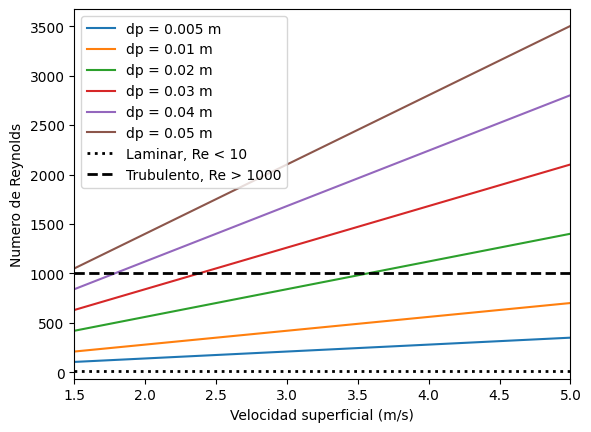

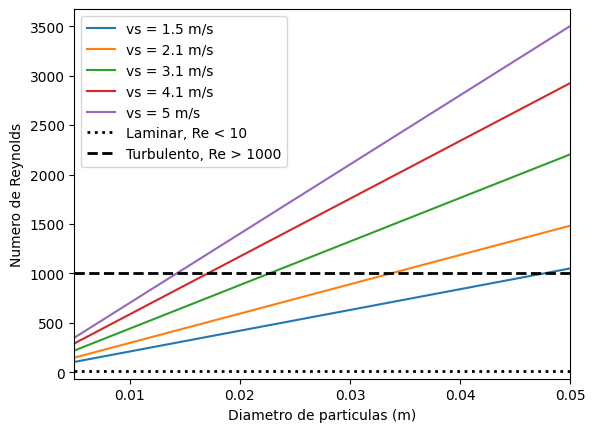

In [32]:
import matplotlib.pyplot as plt
#Graficas en dos dimensiones
#Numero de Reynoldas en funcion de la velocidad superficial
print('Numero de Reynolds:', nRe[:,:])
fig1, ax1 = plt.subplots()
ax1.plot(vs, nRe[ :, 0], label='dp = 0.005 m')
ax1.plot(vs, nRe[ :, 1], label='dp = 0.01 m')
#ax1.plot(vs, nRe[ :, 2], label='dp = 0.015 m')
ax1.plot(vs, nRe[ :, 3], label='dp = 0.02 m')
#ax1.plot(vs, nRe[ :, 4], label='dp = 0.025 m')
ax1.plot(vs, nRe[ :, 5], label='dp = 0.03 m')
#ax1.plot(vs, nRe[ :, 6], label='dp = 0.035 m')
ax1.plot(vs, nRe[ :, 7], label='dp = 0.04 m')
#ax1.plot(vs, nRe[ :, 8], label='dp = 0.045 m')
ax1.plot(vs, nRe[ :, 9], label='dp = 0.05 m')
ax1.axhline(y=10, color='k', label='Laminar, Re < 10',linewidth=2, linestyle=':')
ax1.axhline(y=1000, color='k', label='Trubulento, Re > 1000',linewidth=2, linestyle='--')
ax1.set_xlim(1.5, 5)
#ax1.set_ylim(0, 1000)
ax1.set_xlabel('Velocidad superficial (m/s)')
ax1.set_ylabel('Numero de Reynolds')
#ax1.set_title('Numero de Reynolds vs Velocidad superficial')
ax1.legend()
plt.savefig('RevsUs', dpi=300, bbox_inches='tight')    
plt.show()
# Numero de Reynoldas en funcion del diametro de particulas
fig2, ax2 = plt.subplots()  
ax2.plot(dp_v, nRe[0,:], label='vs = 1.5 m/s')
ax2.plot(dp_v, nRe[3,:], label='vs = 2.1 m/s')
#ax2.plot(dp_v, nRe[5,:], label='vs = 2.5 m/s')  
ax2.plot(dp_v, nRe[8,:], label='vs = 3.1 m/s')
#ax2.plot(dp_v, nRe[11,:], label='vs = 3.5 m/s')
ax2.plot(dp_v, nRe[13,:], label='vs = 4.1 m/s')
#ax2.plot(dp_v, nRe[15,:], label='vs = 4.5 m/s')
ax2.plot(dp_v, nRe[17,:], label='vs = 5 m/s')
ax2.set_xlim(0.005, 0.05)
ax2.axhline(y=10, color='k', label='Laminar, Re < 10',linewidth=2, linestyle=':')
ax2.axhline(y=1000, color='k', label='Turbulento, Re > 1000',linewidth=2, linestyle='--')
#ax2.set_ylim(0, 1000)
ax2.set_xlabel('Diametro de particulas (m)')
ax2.set_ylabel('Numero de Reynolds')
#ax2.set_title('Numero de Reynolds vs Diametro de particulas')
ax2.legend()
plt.savefig('RevsDp', dpi=300, bbox_inches='tight')
plt.show()


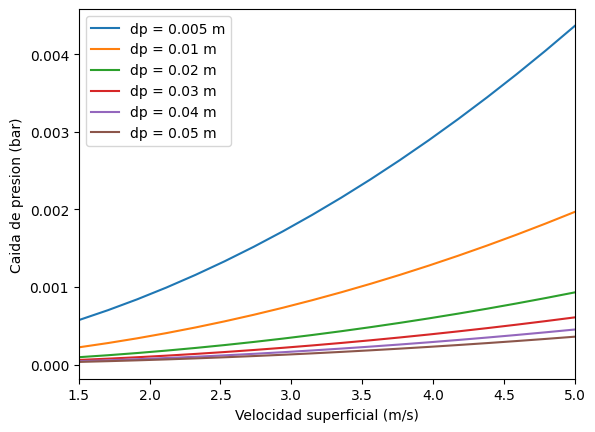

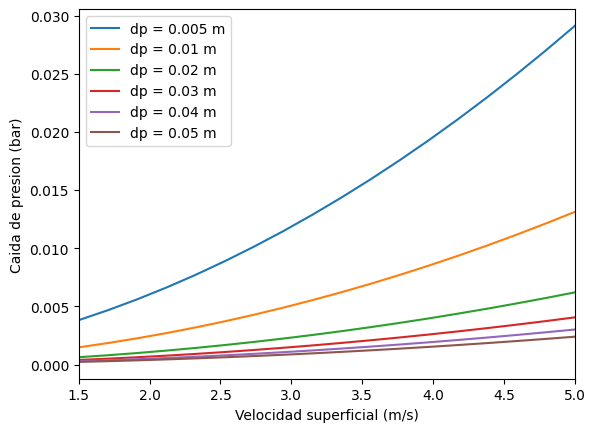

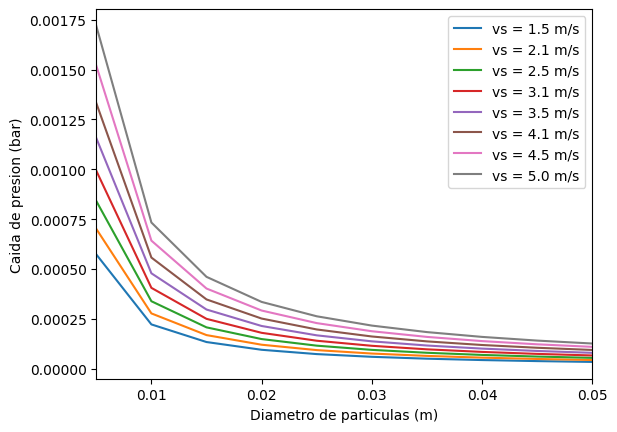

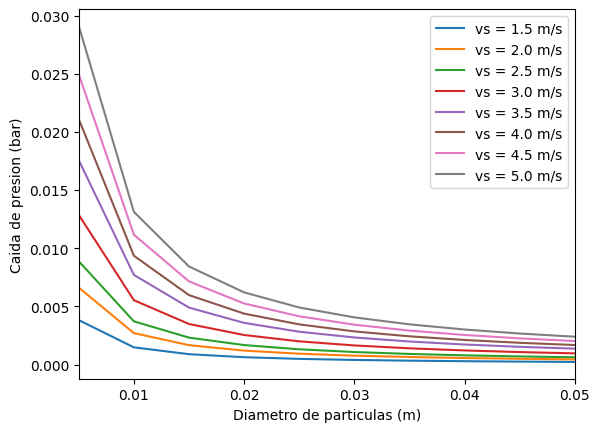

In [33]:

# Caida de presion en funcion de la velocidad superficial para un lecho de 0.3 m
fig3, ax3 = plt.subplots()
ax3.plot(vs, dP_erg[0, :, 0], label='dp = 0.005 m')
ax3.plot(vs, dP_erg[0, :, 1], label='dp = 0.01 m')
#ax3.plot(vs, dP_erg[0, :, 2], label='dp = 0.015 m')
ax3.plot(vs, dP_erg[0, :, 3], label='dp = 0.02 m')
#ax3.plot(vs, dP_erg[0, :, 4], label='dp = 0.025 m')
ax3.plot(vs, dP_erg[0, :, 5], label='dp = 0.03 m')
#ax3.plot(vs, dP_erg[0, :, 6], label='dp = 0.035 m')
ax3.plot(vs, dP_erg[0, :, 7], label='dp = 0.04 m')
#ax3.plot(vs, dP_erg[0, :, 8], label='dp = 0.045 m') 
ax3.plot(vs, dP_erg[0, :, 9], label='dp = 0.05 m')
ax3.set_xlim(1.5, 5)
ax3.set_xlabel('Velocidad superficial (m/s)')
ax3.set_ylabel('Caida de presion (bar)')
#ax3.set_title('Caida de presion para un lecho de 0.3 m')
ax3.legend()
plt.savefig('dPrvsUs_03', dpi=300, bbox_inches='tight')
plt.show()
# Caida de presion en funcion del velocidad superficial para un lecho de 2 m
fig4, ax4 = plt.subplots()
ax4.plot(vs, dP_erg[-1, :, 0], label='dp = 0.005 m')
ax4.plot(vs, dP_erg[-1, :, 1], label='dp = 0.01 m')
#ax4.plot(vs, dP_erg[-1, :, 2], label='dp = 0.015 m')
ax4.plot(vs, dP_erg[-1, :, 3], label='dp = 0.02 m')
#ax4.plot(vs, dP_erg[-1, :, 4], label='dp = 0.025 m')
ax4.plot(vs, dP_erg[-1, :, 5], label='dp = 0.03 m')
#ax4.plot(vs, dP_erg[-1, :, 6], label='dp = 0.035 m')
ax4.plot(vs, dP_erg[-1, :, 7], label='dp = 0.04 m')
#ax4.plot(vs, dP_erg[-1, :, 8], label='dp = 0.045 m')
ax4.plot(vs, dP_erg[-1, :, 9], label='dp = 0.05 m')
ax4.set_xlim(1.5, 5)
ax4.set_xlabel('Velocidad superficial (m/s)')
ax4.set_ylabel('Caida de presion (bar)')
#ax4.set_title('Caida de presion para un lecho de 2 m')
ax4.legend()
plt.savefig('dPrvsUs_2m', dpi=300, bbox_inches='tight')
plt.show()
#Caida de presion en funcion del diametro de particulas para un lecho de 0.3 m
fig5, ax5 = plt.subplots()
ax5.plot(dp_v, dP_erg[0, 0, :], label='vs = 1.5 m/s')
ax5.plot(dp_v, dP_erg[0, 1, :], label='vs = 2.1 m/s')
ax5.plot(dp_v, dP_erg[0, 2, :], label='vs = 2.5 m/s')
ax5.plot(dp_v, dP_erg[0, 3, :], label='vs = 3.1 m/s')
ax5.plot(dp_v, dP_erg[0, 4, :], label='vs = 3.5 m/s')
ax5.plot(dp_v, dP_erg[0, 5, :], label='vs = 4.1 m/s')
ax5.plot(dp_v, dP_erg[0, 6, :], label='vs = 4.5 m/s')
ax5.plot(dp_v, dP_erg[0, 7, :], label='vs = 5.0 m/s')
ax5.set_xlim(0.005, 0.05)
ax5.set_xlabel('Diametro de particulas (m)')
ax5.set_ylabel('Caida de presion (bar)')
#ax5.set_title('Caida de presion vs Diametro de particulas para un lecho de 0.3 m')
ax5.legend()
plt.savefig('dPrvsDp_03', dpi=300, bbox_inches='tight')
plt.show()
#Caida de presion en funcion del diametro de particulas para un lecho de 2 m
fig6, ax6 = plt.subplots()
ax6.plot(dp_v, dP_erg[-1, 0, :], label='vs = 1.5 m/s')
ax6.plot(dp_v, dP_erg[-1, 3, :], label='vs = 2.0 m/s')
ax6.plot(dp_v, dP_erg[-1, 5, :], label='vs = 2.5 m/s')
ax6.plot(dp_v, dP_erg[-1, 8, :], label='vs = 3.0 m/s')
ax6.plot(dp_v, dP_erg[-1, 11, :], label='vs = 3.5 m/s')
ax6.plot(dp_v, dP_erg[-1, 13, :], label='vs = 4.0 m/s')
ax6.plot(dp_v, dP_erg[-1, 15, :], label='vs = 4.5 m/s')
ax6.plot(dp_v, dP_erg[-1, 17, :], label='vs = 5.0 m/s')
ax6.set_xlim(0.005, 0.05)
ax6.set_xlabel('Diametro de particulas (m)')
ax6.set_ylabel('Caida de presion (bar)')
#ax6.set_title('Caida de presion vs Diametro de particulas para un lecho de 2 m')
ax6.legend()
plt.savefig('dPrvsDp_2m', dpi=300, bbox_inches='tight')
plt.show()


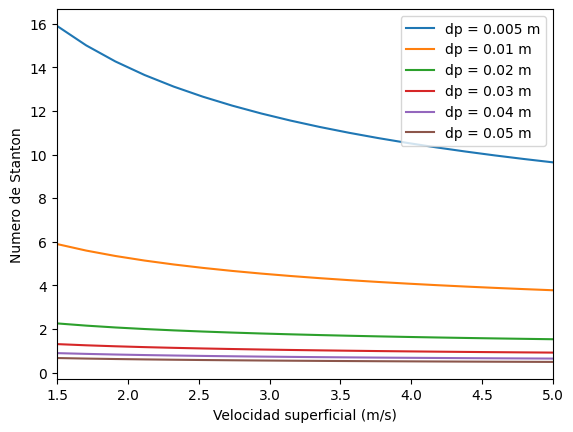

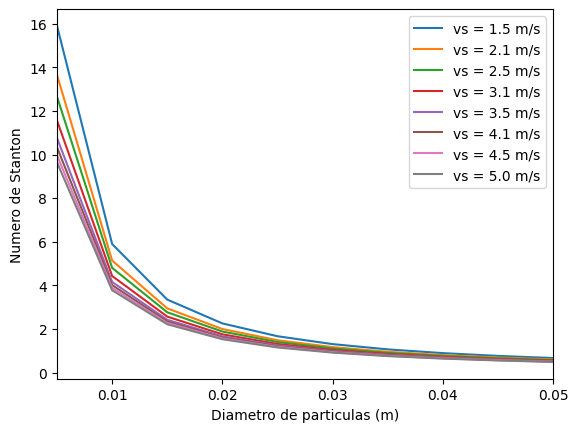

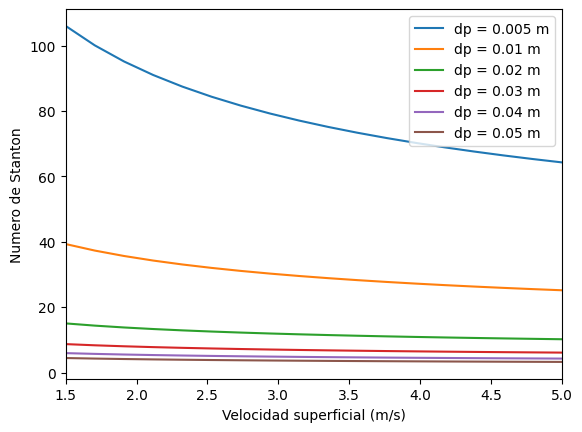

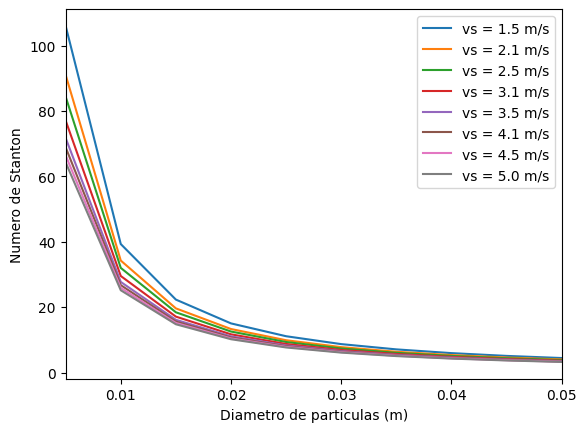

In [30]:

#Numero de Stanton en funcion de la velocidad superficial para un lecho de 0.3 m
#----nSt( longitud, velocidad superficial, area especifica de las particulas)
fig7, ax7 = plt.subplots()
ax7.plot(vs, nSt[0, :, 0], label='dp = 0.005 m')
ax7.plot(vs, nSt[0, :, 1], label='dp = 0.01 m')
#ax7.plot(vs, nSt[0, :, 2], label='dp = 0.015 m')
ax7.plot(vs, nSt[0, :, 3], label='dp = 0.02 m')
#ax7.plot(vs, nSt[0, :, 4], label='dp = 0.025 m')
ax7.plot(vs, nSt[0, :, 5], label='dp = 0.03 m')
#ax7.plot(vs, nSt[0, :, 6], label='dp = 0.035 m')
ax7.plot(vs, nSt[0, :, 7], label='dp = 0.04 m')
#ax7.plot(vs, nSt[0, :, 8], label='dp = 0.045 m')
ax7.plot(vs, nSt[0, :, 9], label='dp = 0.05 m')
ax7.set_xlim(1.5, 5)
ax7.set_xlabel('Velocidad superficial (m/s)')
ax7.set_ylabel('Numero de Stanton')
#ax7.set_title('Numero de Stanton vs Velocidad superficial para un lecho de 0.3 m')
ax7.legend()
plt.savefig('nStvsUs_03', dpi=300, bbox_inches='tight')
plt.show()
#Numero de Stanton en funcion del diametro de particulas para un lecho de 0.3 m
fig8, ax8 = plt.subplots()
ax8.plot(dp_v, nSt[0, 0, :], label='vs = 1.5 m/s')
ax8.plot(dp_v, nSt[0, 3, :], label='vs = 2.1 m/s')
ax8.plot(dp_v, nSt[0, 5, :], label='vs = 2.5 m/s')
ax8.plot(dp_v, nSt[0, 8, :], label='vs = 3.1 m/s')  
ax8.plot(dp_v, nSt[0, 11, :], label='vs = 3.5 m/s')
ax8.plot(dp_v, nSt[0, 13, :], label='vs = 4.1 m/s')
ax8.plot(dp_v, nSt[0, 15, :], label='vs = 4.5 m/s')
ax8.plot(dp_v, nSt[0, 17, :], label='vs = 5.0 m/s')
ax8.set_xlim(0.005, 0.05)
ax8.set_xlabel('Diametro de particulas (m)')
ax8.set_ylabel('Numero de Stanton')
#ax8.set_title('Numero de Stanton vs Diametro de particulas para un lecho de 0.3 m')
ax8.legend()
plt.savefig('nStvsDp_03', dpi=300, bbox_inches='tight')
plt.show()
#Numero de Stanton en funcion de la velocidad superficial para un lecho de 2 m
fig9, ax9 = plt.subplots()
ax9.plot(vs, nSt[-1, :, 0], label='dp = 0.005 m')
ax9.plot(vs, nSt[-1, :, 1], label='dp = 0.01 m')
#ax9.plot(vs, nSt[-1, :, 2], label='dp = 0.015 m')
ax9.plot(vs, nSt[-1, :, 3], label='dp = 0.02 m')
#ax9.plot(vs, nSt[-1, :, 4], label='dp = 0.025 m')
ax9.plot(vs, nSt[-1, :, 5], label='dp = 0.03 m')
#ax9.plot(vs, nSt[-1, :, 6], label='dp = 0.035 m')
ax9.plot(vs, nSt[-1, :, 7], label='dp = 0.04 m')
#ax9.plot(vs, nSt[-1, :, 8], label='dp = 0.045 m')
ax9.plot(vs, nSt[-1, :, 9], label='dp = 0.05 m')
ax9.set_xlim(1.5, 5)
ax9.set_xlabel('Velocidad superficial (m/s)')
ax9.set_ylabel('Numero de Stanton')
#ax9.set_title('Numero de Stanton vs Velocidad superficial para un lecho de 2 m')
ax9.legend()
plt.savefig('nStvsUs_2m', dpi=300, bbox_inches='tight')
plt.show()
#Numero de Stanton en funcion del diametro de particulas para un lecho de 2 m
fig10, ax10 = plt.subplots()
ax10.plot(dp_v, nSt[-1, 0, :], label='vs = 1.5 m/s')
ax10.plot(dp_v, nSt[-1, 3, :], label='vs = 2.1 m/s')
ax10.plot(dp_v, nSt[-1, 5, :], label='vs = 2.5 m/s')
ax10.plot(dp_v, nSt[-1, 8, :], label='vs = 3.1 m/s')
ax10.plot(dp_v, nSt[-1, 11, :], label='vs = 3.5 m/s')
ax10.plot(dp_v, nSt[-1, 13, :], label='vs = 4.1 m/s')
ax10.plot(dp_v, nSt[-1, 15, :], label='vs = 4.5 m/s')
ax10.plot(dp_v, nSt[-1, 17, :], label='vs = 5.0 m/s')
ax10.set_xlim(0.005, 0.05)
ax10.set_xlabel('Diametro de particulas (m)')
ax10.set_ylabel('Numero de Stanton')
#ax10.set_title('Numero de Stanton vs Diametro de particulas para un lecho de 2 m')
ax10.legend()
plt.savefig('nStvsDp_2m', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
print(Ls)

[0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


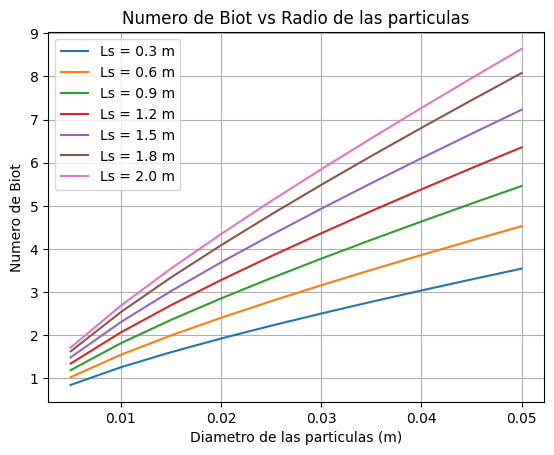

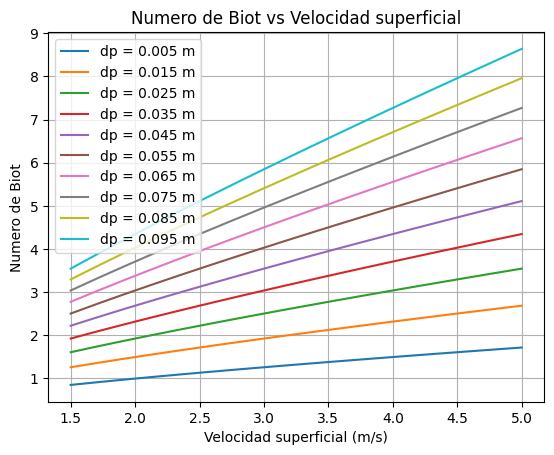

In [31]:
import matplotlib.pyplot as plt
# Graficar el numero de Biot en funcion del radio de las particulas
# nBi( longitud(18), diametro de particulas(10))
fig11, ax11 = plt.subplots()
ax11.plot(dp_v, nBi[0,:], label='Ls = 0.3 m')
ax11.plot(dp_v, nBi[3,:], label='Ls = 0.6 m')
ax11.plot(dp_v, nBi[6,:], label='Ls = 0.9 m')
ax11.plot(dp_v, nBi[9,:], label='Ls = 1.2 m')
ax11.plot(dp_v, nBi[12,:], label='Ls = 1.5 m')
ax11.plot(dp_v, nBi[15,:], label='Ls = 1.8 m')
ax11.plot(dp_v, nBi[17,:], label='Ls = 2.0 m')
ax11.set_xlabel('Diametro de las particulas (m)')
ax11.set_ylabel('Numero de Biot')
ax11.set_title('Numero de Biot vs Radio de las particulas')
ax11.legend()
ax11.grid()
plt.show()
#Numero de Biot en funcion de la velocidad superficial
fig12, ax12 = plt.subplots()
ax12.plot(vs, nBi[:, 0], label='dp = 0.005 m')
ax12.plot(vs, nBi[:, 1], label='dp = 0.015 m')
ax12.plot(vs, nBi[:, 2], label='dp = 0.025 m')
ax12.plot(vs, nBi[:, 3], label='dp = 0.035 m')
ax12.plot(vs, nBi[:, 4], label='dp = 0.045 m')
ax12.plot(vs, nBi[:, 5], label='dp = 0.055 m')
ax12.plot(vs, nBi[:, 6], label='dp = 0.065 m')
ax12.plot(vs, nBi[:, 7], label='dp = 0.075 m')
ax12.plot(vs, nBi[:, 8], label='dp = 0.085 m')
ax12.plot(vs, nBi[:, 9], label='dp = 0.095 m')
ax12.set_xlabel('Velocidad superficial (m/s)')
ax12.set_ylabel('Numero de Biot')
ax12.set_title('Numero de Biot vs Velocidad superficial')
ax12.legend()
ax12.grid()
plt.show()  


In [90]:

#Parametros de analisis
muc = mud/rhog # Viscosidad cinemática del gas [m2/s]
print('Viscosidad cinemática del gas:', muc)
# Numero de Reynolds
Red = dp*Us/muc   #Red = dp*Us*rhog/muc
print('Numero de Reynolds:', Red)
Pr = (Cpg*mud)/Kg
Pr = 0.7 # Numero de Prandtl
print('Numero de Prandtl:', Pr)
# Numero de Nusselt
Nu = 2 + (2.031)*Red**0.5*Pr**(1/3) + (0.049)*Red*Pr**(1/2)
print('Numero de Nusselt : ', Nu)
#Conductividad termica efectiva del aire
Kgx = (0.5*Pr*Red*Kg)/e
Kgx= 0.03808 
print('Conductividad termica efectiva del gas:', Kgx, 'W.m^-1.K^-1')
#Conductividad termica del lecho
m = 0.28 - 0.757*np.log(e) - 0.057*np.log(Ks/Kg) 
Ke0 = Kg*((Ks/Kg)**m)
Ksx = (Ke0+(0.5*Pr*Red*Ks)-e*Kgx)/(1-e)
Ksx = 1.44971
print('Conductividad termica efectiva del lecho : ', Ksx , 'W.m^-1.K^-1')
#Coeficiente de transferencia de calor h
h=Nu*Kg/dp
h= 92.7
print('Coeficiente de transferencia de calor : ', h, 'W.m^-2.K^-1')
#Numero adimensionales a partir de las definiciones del articulo de Ramachandran
St = h*ap*L/(Us*rhog*Cpg)
print('Numero de Stanton : ', St)
#Biot de las particulas
Bi = h*(dp/2)/(Ks)
print('Numero de Biot : ', Bi)
#Numero de Peclet
Pe = (Us*rhog*Cpg*L)/0.04
print('Numero de Peclet : ', Pe)
#Difusividad termica 
alpha = Kgx/(rhog*Cpg)
print('Difusividad termica del gas : ', alpha, 'm2/s')
print('Velocidad superficial del gas : ', Us, 'm/s')


Viscosidad cinemática del gas: 7.137254901960783e-05
Numero de Reynolds: 1513.1868131868134
Numero de Prandtl: 0.7
Numero de Nusselt :  134.18424036436198
Conductividad termica efectiva del gas: 0.03808 W.m^-1.K^-1
Conductividad termica efectiva del lecho :  1.44971 W.m^-1.K^-1
Coeficiente de transferencia de calor :  92.7 W.m^-2.K^-1
Numero de Stanton :  5.906400295967444
Numero de Biot :  0.08800632911392405
Numero de Peclet :  48654.0
Difusividad termica del gas :  7.044025157232704e-05 m2/s
Velocidad superficial del gas :  3.6 m/s


In [86]:
print(e)



0.843


In [ ]:
Rep = dp*Us*rhog/(mud)
G_0 = Us/rhog
dP_erg = ((150/Rep)+1.75)*(((G_0**2)*L*(1-e))/(rhog*dp*e**3))
print('Caida de presion Ergun : ', dP_erg) 

Numero de Reynolds de las particulas :  1513.1868131868132
Caida de presion Ergun :  1578.1825926570807


In [178]:
import numpy as np
omega = 7.26E-3
kapa = Ks/Kg #parametro adimensional de conductividad termica
B = 1.25*((1-e)/e)**(10/9)
k1 = 1-(B/kapa)
k2 = B/kapa
k3 = (B-1)/k1
Gamma = (2/k1)*( (kapa/(k1**2))*(B/kapa)*np.log(kapa/B)- ((B-1)/k1)-(0.5)*(B+1) ) 
# Conductividad térmica efectiva según ZBS
Kzbs_g = (1-np.sqrt(1-e))*Kg/e
Kzbs_s = np.sqrt(1-e)*(omega*kapa+(1-omega)*Gamma)*Kg/(1-e)

print('Conductividad térmica efectiva (ZBS):', Kzbs_g, 'W/m.K')
print('Conductividad térmica efectiva de las partículas (ZBS):', Kzbs_s, 'W/m.K')

Conductividad térmica efectiva (ZBS): 0.025735694156699126 W/m.K
Conductividad térmica efectiva de las partículas (ZBS): 1.1172055303108372 W/m.K


In [9]:
'''
Informacion del Atlas del Calor VDI HEAT ATLAS 2010
El aire tiene una composicion de Oxigeno, Argon, y Nitrogeno
Sustancia & fraccion molar & masa molecular(g/mol) & Fraccion de masa
N2         //  0.7812      //      28.013         //     0.75570
Ar         //  0.0092      //      39.948         //     0.01269
O2         //  0.2096      //      31.999         //     0.23161
Masa molecular de la mezcla Mw = 28.9583 g/mol
Constante especifica de la mezcla R = 0.28712 kJ/kg.K
'''
import numpy as np
Ag =  2548.9320; Bg = 3.5248; Cg = -0.6366; Dg = -3.4281; Eg =49.8238; Fg=-120.3466; Gg =98.8658
R =  0.28712*1000 #J.kg^-1.K^-1
Tc = 132.53 #Temperatura critica Kelvin (aire)         
#Temperatura en Celsius
Tgask = 272.5 + Te #Temperatura en Kelvin
C1 = (Cg-Bg)*((Tgask/(Ag+Tgask)))**2
C2 = 1 - (Ag/(Ag+Tgask))*(Dg + Eg*(Tgask/(Ag+Tgask)) + Fg*(Tgask/(Ag+Tgask))**2 + Gg*(Tgask/(Ag+Tgask))**3)
Cpg = R*(Bg + C1*C2)
print('Calor especifico del aire = ',Cpg, 'J/kg*K')
'''
Informacion del Atlas del Calor VDI HEAT ATLAS 2010
Viscosidad dinamica para gases

'''
Au = -0.01702E-5; Bu = 0.79965E-7; Cu = -0.72183E-10; Du = 0.04960E-12; Eu = -0.01388E-15
Tr = Tgask/Tc
mud = Au + Bu*(Tgask) + Cu*(Tgask**2) + Du*(Tgask**3) + Eu*(Tgask**4)
print('Viscosidad Dinamica', mud, 'Pa.s')
'''
Conductividad termica de los gases VDI HEAT ATLAS 2010

'''
Al = -0.908E-3 ;Bl = 0.112E-3 ;Cl = -0.084333E-6; Dl = 0.056964E-9; El =-0.015631E-12
Kg = Al + Bl*(Tgask) + Cl*(Tgask**2) + Dl*(Tgask**3) + El*(Tgask**4)
print('Conductividad termica del aire : ', Kg , 'W/m.K')
'''
Viscosidad cinematica
'''
muc = mud/rhog
print('Viscosidad cinematica', muc, 'm^2.s^-1')
'''
Numero de Reynolds intersticial
'''
Red = dp*Us/muc
print('Numero de Reynolds : ', Red)
#Numero de Prandtl
Pr = (Cpg*mud)/Kg
print('Numero de Prandtl : ', Pr)
'''
Numero de Nusselt
'''
Nu = 2 + (2.031)*Red**0.5*Pr**(1/3) + (0.049)*Red*Pr**(1/2)
print('Numero de Nusselt : ', Nu)
'''
Conductividad termica efectiva del aire
'''
Kgx = (0.5*Pr*Red*Kg)/es
print('Conductividad termica efectiva del aire : ', Kgx, 'W.m^-1.K^-1')
'''
Conductividad termica efectiva del lecho
'''
m = 0.28 - 0.757*np.log(es) - 0.057*np.log(Ks/Kg) 
Ke0 = Kg*(Ks/Kg)**m
Ksx = (Ke0+0.5*Pr*Red*Ks-es*Kgx)/(1-ea)
print('Conductividad termica efectiva del lecho : ', Ksx , 'W.m^-1.K^-1')
'''
Coeficiente de transferencia de calor h convectivo
'''
h=Nu*Kg/dp
print('Coeficiente de transferencia de calor : ', h, 'W.m^-2.K^-1')

Calor especifico del aire =  1139.7176169455686 J/kg*K
Viscosidad Dinamica 4.331735883498913e-05 Pa.s
Conductividad termica del aire :  0.06806614719394401 W/m.K
Viscosidad cinematica 8.493599771566497e-05 m^2.s^-1
Numero de Reynolds :  1271.5456685579297
Numero de Prandtl :  0.7253173423070198
Numero de Nusselt :  120.13370048111315
Conductividad termica efectiva del aire :  50.6255212430338 W.m^-1.K^-1
Conductividad termica efectiva del lecho :  11701.599434616963 W.m^-1.K^-1
Coeficiente de transferencia de calor :  272.56793799668765 W.m^-2.K^-1


In [42]:
#Numero adimensionales a partir de las definiciones del articulo de Ramachandran
St = h*ap*L/(Us*rhog*Cpg)
print('Numero de Stanton : ', St)
#Biot de las particulas
Bi = h*(dp/2)/(Ks)
print('Numero de Biot : ', Bi)
#Numero de Peclet
Pe = (Us*rhog*Cpg*L)/Kgx
print('Numero de Peclet : ', Pe)

Numero de Stanton :  5.906400295967444
Numero de Biot :  0.08800632911392405
Numero de Peclet :  51107.142857142855


3.3333333333333335